In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
ords_prods_merge = pd.read_pickle(r'C:\Users\matth\OneDrive\Documents\Matthew\Coding Class\Career_Foundry Data Science Course\2. Data Immersion\Lesson 4\Python Folder for Lesson 4\02 Data\Prepared Data\4.8_ords_prods_merge.pkl')

In [4]:
path = r'C:\Users\matth\OneDrive\Documents\Matthew\Coding Class\Career_Foundry Data Science Course\2. Data Immersion\Lesson 4\Python Folder for Lesson 4'

<AxesSubplot:>

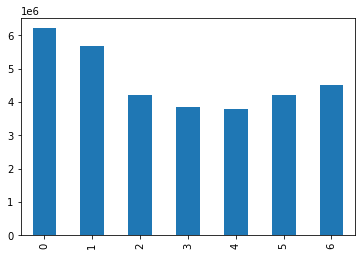

In [9]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [10]:
ords_prods_merge['order_dow'].value_counts(dropna=False)

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: order_dow, dtype: int64

In [11]:
ords_prods_merge['order_dow'].value_counts(dropna=False).sort_index()

0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: order_dow, dtype: int64

<AxesSubplot:>

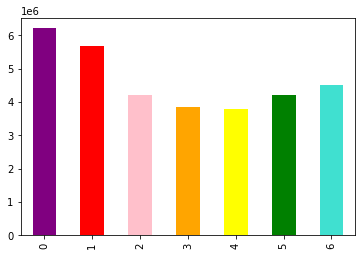

In [13]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'turquoise'])

#I changed the blue to turquoise because my display shows blue as purple and I found the list of colors online#

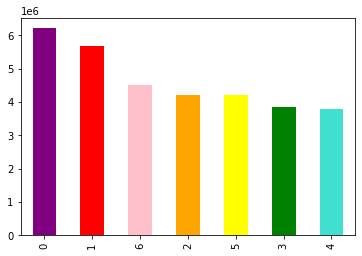

In [15]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'turquoise'])

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

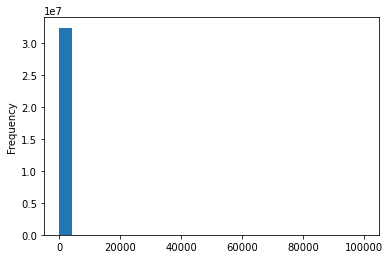

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

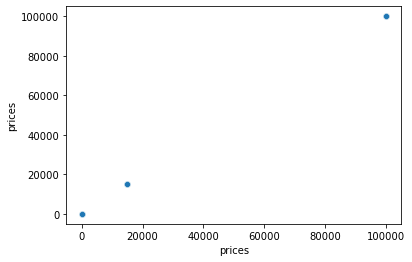

In [3]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [5]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

AttributeError: 'float' object has no attribute 'loc'

In [4]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

AttributeError: 'float' object has no attribute 'loc'

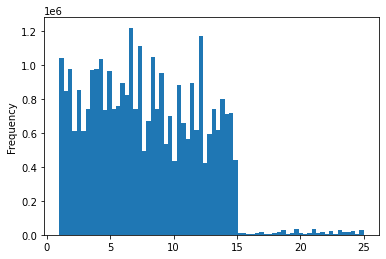

In [6]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [7]:
#Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 
#100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is 
#“assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, 
#since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any 
#rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two 
#dataframes at a 70/30 ratio. This all sounds a little abstract. Let’s see how it works in practice:

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [8]:
#1 Set the seed for the random number generator.
#2 Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
#3 Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#4 Store the results of the test in a new list, dev, in the form of boolean values (True and False).

#You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your 
#list to split your dataframe into two samples? This will involve an elegant hack:

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [9]:
df_2 = small[['order_dow','prices']]

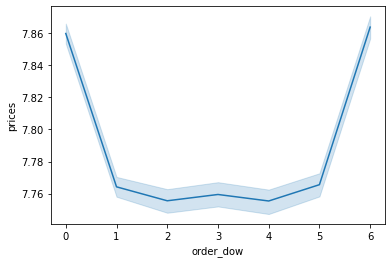

In [10]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [11]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_price_by_dow.png'))

In [12]:
##Questions for 4.9##

In [13]:
#1 Download the customer data set and add it to your “Original Data” folder.
#2 Create a new notebook in your “Scripts” folder for part 1 of this task.
#3 Import your analysis libraries, as well as your new customer data set as a dataframe.

In [28]:
customers = pd.read_csv(r'C:\Users\matth\OneDrive\Documents\Matthew\Coding Class\Career_Foundry Data Science Course\2. Data Immersion\Lesson 4\Python Folder for Lesson 4\02 Data\Original Data\customers.csv')


In [4]:
#4 Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns 
#that don’t add anything to your analysis.

#4.1 read the columns in the new dataset:

customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [29]:
#4.2 rename columns. Namely, no one uses 'surnam' so we will change that to Last Name and we can simplify n_dependants to 
#denpendants. Also we can change STATE to State

customers.rename(columns = {'Surnam' : 'Last Name'}, inplace = True)
customers.rename(columns = {'n_dependants' : 'dependants'}, inplace = True)
customers.rename(columns = {'STATE' : 'State'}, inplace = True)

In [20]:
#4.2.1 Check:

customers.head()

,user_id,First Name,Last Name,Gender,State,Age,date_joined,dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [30]:
#4.2.2 Rename the States

customers['State'].replace({
        'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}, inplace=True)

In [32]:
#4.2.2 We can drop the join date of these customers since it really isn't necessary

customers.drop(columns=['date_joined'])

,user_id,First Name,Last Name,Gender,State,Age,dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,MO,48,3,married,165665
1,33890,Patricia,Hart,Female,NM,36,0,single,59285
2,65803,Kenneth,Farley,Male,ID,35,2,married,99568
3,125935,Michelle,Hicks,Female,IA,40,0,single,42049
4,130797,Ann,Gilmore,Female,MD,26,1,married,40374
...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,NC,44,1,married,148828
206205,49635,Jeremy,Robbins,Male,HI,62,3,married,168639
206206,135902,Doris,Richmond,Female,MO,66,2,married,53374
206207,81095,Rose,Rollins,Female,CA,27,1,married,99799


In [8]:
#5 Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; 
#for example, check for and address missing values and duplicates, and convert any mixed-type data.

#5.1 Let's check the shape:

customers.shape

(206209, 10)

In [7]:
customers_clean = customers[customers['user_id'].isnull() == False]
customers_dups = customers_clean[customers_clean.duplicated()]
customers_dups

,user_id,First Name,Last Name,Gender,State,Age,date_joined,dependants,fam_status,income


In [8]:
customers_clean.shape

(206209, 10)

In [38]:
#5.1.1 This lets us know that there were no duplicates based on the unique customer's 'user_id'

In [33]:
#5.1.2 Let's check descriptive data:

customers.describe()

,user_id,Age,dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [9]:
#5.2 Time to check for mixed-type data

for col in customers.columns.tolist():
  weird = (customers[[col]].applymap(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

First Name


In [10]:
#5.2.1 The First Name column has mixed data. Let's fix it

#first, let's check for missing values

customers.isnull().sum()

user_id            0
First Name     11259
Last Name          0
Gender             0
State              0
Age                0
date_joined        0
dependants         0
fam_status         0
income             0
dtype: int64

In [34]:
#there are 11259 instances of missing 'First Name'

#5.2.2 so let's just label those as missing

#5.2.3 Now we can fill in the blank spaces with NA

customers = customers.replace(np.nan, 'NA', regex=True)


In [35]:
customers.isnull().sum()

user_id        0
First Name     0
Last Name      0
Gender         0
State          0
Age            0
date_joined    0
dependants     0
fam_status     0
income         0
dtype: int64

In [36]:
customers.dtypes

user_id         int64
First Name     object
Last Name      object
Gender         object
State          object
Age             int64
date_joined    object
dependants      int64
fam_status     object
income          int64
dtype: object

In [ ]:
 #For the purposes of making data more manageable, we can change the file sizes from their 64bit (int64) to a smaller one
    
customers = customers.astype({col:'int16' for col in customers.select_dtypes('int64').columns})

In [15]:
#6 Combine your customer data with the rest of your prepared Instacart data. Tip: Make sure the key columns 
#are of the same data type!



In [13]:
#repeat the checks we did for our customers dataframe in the ords_prods_merge dataframe

for col in ords_prods_merge.columns.tolist():
  weird = (ords_prods_merge[[col]].applymap(type) != ords_prods_merge[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (ords_prods_merge[weird]) > 0:
    print (col)

product_name


In [14]:
#check how many missing data are in each column

ords_prods_merge.isnull().sum()

product_id                      0
product_name                28171
aisle_id                        0
department_id                   0
prices                          0
order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078084
add_to_cart_order               0
reordered                       0
_merge                          0
busiest day                     0
busiest two-day                 0
busiest_period_of_day           0
spending                        0
spending_flag                   0
frequency                       0
frequency_flag                  0
dtype: int64

In [ ]:
#Same as before, we can shrink down the size which makes merging easier later on.

ords_prods_merge = ords_prods_merge.astype({col:'int16' for col in ords_prods_merge.select_dtypes('int64').columns})

In [ ]:
#merge the files, this will take a long time

customers_ords_merge = customers.merge(ords_prods_merge, on = ['user_id'],how = 'left', indicator = True)

In [ ]:
#to pickle

customers_ords_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_ords_merge.pkl'))